<a href="https://colab.research.google.com/github/ShiviV/DHL-Sentiment-and-Topic-modelling/blob/main/Topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import word_tokenize
from nltk import pos_tag
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import RegexpTokenizer
from nltk import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from wordcloud import WordCloud
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [119]:
df = pd.read_csv('Master_data.csv')

In [121]:
df.rename(columns={'reviewer_review': 'reviews'}, inplace=True)

In [122]:
df['reviews'].head(10)

,reviews
0,DHL is the biggest lying package delivery comp...
1,Parcel for Norway delivered to UK address (us)...
2,Shittiest delivery service ever. I got a $500 ...
3,Driver refused to deliver to my house despite ...
4,The entire DHL experience was a nightmare with...
5,Received TELEPHONE CALL not email saying emai...
6,"Wasn't home when tried to deliver, spoke to hi..."
7,"Worst experience, very rude and not cooperating"
8,Booked a courier for collection on Monday and ...
9,"Hey, i am completely disappointed for the deli..."


In [123]:
df['reviews'] = df['reviews'].astype(str)

In [124]:
df['r_processed'] = [reviews.lower() for reviews in df['reviews']]

In [125]:
df['reviews'].head(10)

,reviews
0,DHL is the biggest lying package delivery comp...
1,Parcel for Norway delivered to UK address (us)...
2,Shittiest delivery service ever. I got a $500 ...
3,Driver refused to deliver to my house despite ...
4,The entire DHL experience was a nightmare with...
5,Received TELEPHONE CALL not email saying emai...
6,"Wasn't home when tried to deliver, spoke to hi..."
7,"Worst experience, very rude and not cooperating"
8,Booked a courier for collection on Monday and ...
9,"Hey, i am completely disappointed for the deli..."


In [126]:
all_words = [word for tokens in df['reviews'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['reviews']]
vocab = sorted(list(set(all_words)))

print('{} tokens total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

41525 tokens total, with a vocabulary size of 81
Max tweet length is 3164


In [127]:
word_length = []
for word in all_words:
    word_length.append(len(word))

In [128]:
print('average word size is {}'.format( sum(word_length) / len(word_length)))

average word size is 1.0


In [129]:
less_than_3_tokens = df[df['reviews'].apply(lambda x: len(x) <= 3)].index

In [130]:
df.drop(less_than_3_tokens, inplace = True)

In [131]:
all_words = [word for tokens in df['reviews'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['reviews']]
vocab = sorted(list(set(all_words)))

print('{} tokens total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

41480 tokens total, with a vocabulary size of 81
Max tweet length is 3164


In [132]:

flat_words = [item for sublist in df['reviews'] for item in sublist]

In [133]:
from nltk.probability import FreqDist # Import the FreqDist object from nltk.probability module

flat_words = [item for sublist in df['reviews'] for item in sublist]
word_freq = FreqDist(flat_words)

In [134]:
word_freq = FreqDist(flat_words)

In [42]:
!pip uninstall gensim -y
!pip install numpy==1.21.0
!pip install gensim

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [135]:
df['reviews'] = df['reviews'].astype(str)

In [136]:
df['reviews']

,reviews
0,DHL is the biggest lying package delivery comp...
1,Parcel for Norway delivered to UK address (us)...
2,Shittiest delivery service ever. I got a $500 ...
3,Driver refused to deliver to my house despite ...
4,The entire DHL experience was a nightmare with...
...,...
75,"To Whom It May Concern,\n\nI am pleased to com..."
76,They are awful. My package has been sitting in...
77,"Ordered a fruit basket for a new mother, got n..."
78,I only gave one star because I can't give 0 st...


In [70]:
!pip install --upgrade numpy

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [71]:
pip install --upgrade gensim

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4


In [137]:
df['reviews']

,reviews
0,DHL is the biggest lying package delivery comp...
1,Parcel for Norway delivered to UK address (us)...
2,Shittiest delivery service ever. I got a $500 ...
3,Driver refused to deliver to my house despite ...
4,The entire DHL experience was a nightmare with...
...,...
75,"To Whom It May Concern,\n\nI am pleased to com..."
76,They are awful. My package has been sitting in...
77,"Ordered a fruit basket for a new mother, got n..."
78,I only gave one star because I can't give 0 st...


In [114]:
!pip uninstall numpy -y
!pip install numpy==1.21.0


  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user


In [ ]:
!pip uninstall numpy -y

In [ ]:
!pip install numpy==1.26.0


In [ ]:
!pip install gensim


In [81]:
!pip uninstall gensim -y
!pip install numpy==1.21.0
!pip install gensim

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [117]:
!pip uninstall numpy -y
!pip install numpy==1.21.0
!pip install gensim

  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (numpy)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)


In [119]:
!pip uninstall numpy -y
!pip install numpy==1.21.0
!pip install gensim

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached numpy-1.21.0.zip (10.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
^C


In [ ]:
!pip install numpy==1.26.4
!pip install gensim==4.3.3


In [138]:
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Ensure stopwords are downloaded
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess(df_text):
    """Preprocesses text data for LDA."""
    tokens = word_tokenize(df_text)
    # Relaxed filtering: keep words with length >= 2 (instead of > 3)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words and len(token) >= 2]
    lemmatized = [lemmatizer.lemmatize(w) for w in stopwords_removed]
    # Keep words containing alphabets and numbers, allowing more terms
    processed = list(filter(lambda x: x.isalnum(), lemmatized))
    return processed

# Apply preprocessing
df['reviews'] = df['reviews'].apply(preprocess)

# Create dictionary
text_dict = Dictionary(df['reviews'])

# Less restrictive filtering: allow more terms
text_dict.filter_extremes(no_below=2, no_above=0.95) # Changed no_below to 2 and no_above to 0.95

# Proceed with creating the bow representation and LDA model
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['reviews']]
# ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
from gensim.corpora import Dictionary

text_dict = Dictionary(df.reviews) # Using df.reviews instead of df.text

In [140]:
text_dict.filter_extremes(no_below = 5, no_above = .90)

In [141]:
txt_out = text_dict.token2id

# for k, v in txt_out.items():
#     print(k,v)

In [142]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in df['reviews']]

In [143]:
tweets_bow[0]

[(0, 1),
 (1, 2),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 3),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 3),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1)]

In [144]:
from gensim.models.ldamodel import LdaModel # Importing the LdaModel class

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

In [145]:
tweets_lda.show_topics()

[(0,
  '0.092*"delivery" + 0.066*"march" + 0.062*"parcel" + 0.032*"service" + 0.031*"would" + 0.030*"sender" + 0.027*"said" + 0.027*"day" + 0.027*"home" + 0.023*"driver"'),
 (1,
  '0.094*"day" + 0.073*"time" + 0.033*"package" + 0.032*"dhl" + 0.032*"parcel" + 0.031*"delivered" + 0.031*"still" + 0.025*"driver" + 0.022*"address" + 0.021*"item"'),
 (2,
  '0.061*"dhl" + 0.054*"service" + 0.035*"would" + 0.035*"customer" + 0.029*"day" + 0.024*"time" + 0.023*"form" + 0.022*"number" + 0.019*"could" + 0.019*"said"'),
 (3,
  '0.068*"parcel" + 0.054*"dhl" + 0.045*"delivery" + 0.032*"driver" + 0.032*"depot" + 0.029*"hour" + 0.025*"made" + 0.023*"said" + 0.023*"attempt" + 0.022*"delivered"'),
 (4,
  '0.062*"dhl" + 0.047*"company" + 0.038*"package" + 0.032*"get" + 0.027*"day" + 0.024*"number" + 0.024*"phone" + 0.024*"use" + 0.024*"another" + 0.024*"way"')]

Topic 0: Customer service and contact details
Key Words: dhl, phone, number, home, parcel, delivery, service

Description: This topic seems to be about issues related to customer service, including contact details (e.g., phone numbers), parcels, and home delivery.

Topic 1: Delivery delays and review
Key Words: day, company, still, delivery, dhl, review, star, waiting

Description: This topic focuses on delivery delays (still waiting), reviews, and customer frustration related to delivery times.

Topic 2: DHL service and delivery time
Key Words: service, dhl, time, driver, day, customer, delivered

Description: This topic appears to be centered around the quality of DHL's service and delivery times, including feedback on drivers and delivery efficiency.

Topic 3: Parcel and delivery issues
Key Words: parcel, delivery, march, depot, driver, day, sender, said, dhl

Description: This topic is related to issues with parcels and deliveries, including the involvement of depots, drivers, and certain dates like "March" when the delivery is expected.

Topic 4: Delivery and package handling
Key Words: package, day, dhl, door, left, delivery, company, review

Description: This topic highlights issues related to packages being left at the door, delays, and reviews, with a focus on delivery handling.



In [146]:
def format_topics_sentences(ldamodel=None, corpus=tweets_bow, texts=df['reviews']):
    # Init output
    sent_topics_df = pd.DataFrame()
    sent_topics_data = [] #list to hold data before creating dataframe
    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[tweets_bow]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                # Append data as a list to sent_topics_data
                sent_topics_data.append([int(topic_num), round(prop_topic,4), topic_keywords])
            else:
                break
    # Create DataFrame outside the loop
    sent_topics_df = pd.DataFrame(sent_topics_data, columns=['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=tweets_lda, corpus=tweets_bow, texts=df['reviews'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.9687,"dhl, company, package, get, day, number, phone...","[dhl, biggest, lying, package, delivery, compa..."
1,1,4,0.9736,"dhl, company, package, get, day, number, phone...","[parcel, norway, delivered, uk, address, u, ev..."
2,2,0,0.9313,"delivery, march, parcel, service, would, sende...","[shittiest, delivery, service, ever, got, 500,..."
3,3,0,0.4968,"delivery, march, parcel, service, would, sende...","[driver, refused, deliver, house, despite, giv..."
4,4,2,0.9827,"dhl, service, would, customer, day, time, form...","[entire, dhl, experience, nightmare, exception..."
5,5,2,0.9378,"dhl, service, would, customer, day, time, form...","[received, telephone, call, email, saying, ema..."
6,6,0,0.9689,"delivery, march, parcel, service, would, sende...","[home, tried, deliver, spoke, ring, doorbell, ..."
7,7,1,0.5948,"day, time, package, dhl, parcel, delivered, st...","[worst, experience, rude, cooperating]"
8,8,3,0.9419,"parcel, dhl, delivery, driver, depot, hour, ma...","[booked, courier, collection, monday, show, ca..."
9,9,0,0.9907,"delivery, march, parcel, service, would, sende...","[hey, completely, disappointed, delivery, orde..."


In [147]:
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.9687,"dhl, company, package, get, day, number, phone...","[dhl, biggest, lying, package, delivery, compa..."
1,1,4,0.9736,"dhl, company, package, get, day, number, phone...","[parcel, norway, delivered, uk, address, u, ev..."
2,2,0,0.9313,"delivery, march, parcel, service, would, sende...","[shittiest, delivery, service, ever, got, 500,..."
3,3,0,0.4968,"delivery, march, parcel, service, would, sende...","[driver, refused, deliver, house, despite, giv..."
4,4,2,0.9827,"dhl, service, would, customer, day, time, form...","[entire, dhl, experience, nightmare, exception..."
5,5,2,0.9378,"dhl, service, would, customer, day, time, form...","[received, telephone, call, email, saying, ema..."
6,6,0,0.9689,"delivery, march, parcel, service, would, sende...","[home, tried, deliver, spoke, ring, doorbell, ..."
7,7,1,0.5948,"day, time, package, dhl, parcel, delivered, st...","[worst, experience, rude, cooperating]"
8,8,3,0.9419,"parcel, dhl, delivery, driver, depot, hour, ma...","[booked, courier, collection, monday, show, ca..."
9,9,0,0.9907,"delivery, march, parcel, service, would, sende...","[hey, completely, disappointed, delivery, orde..."


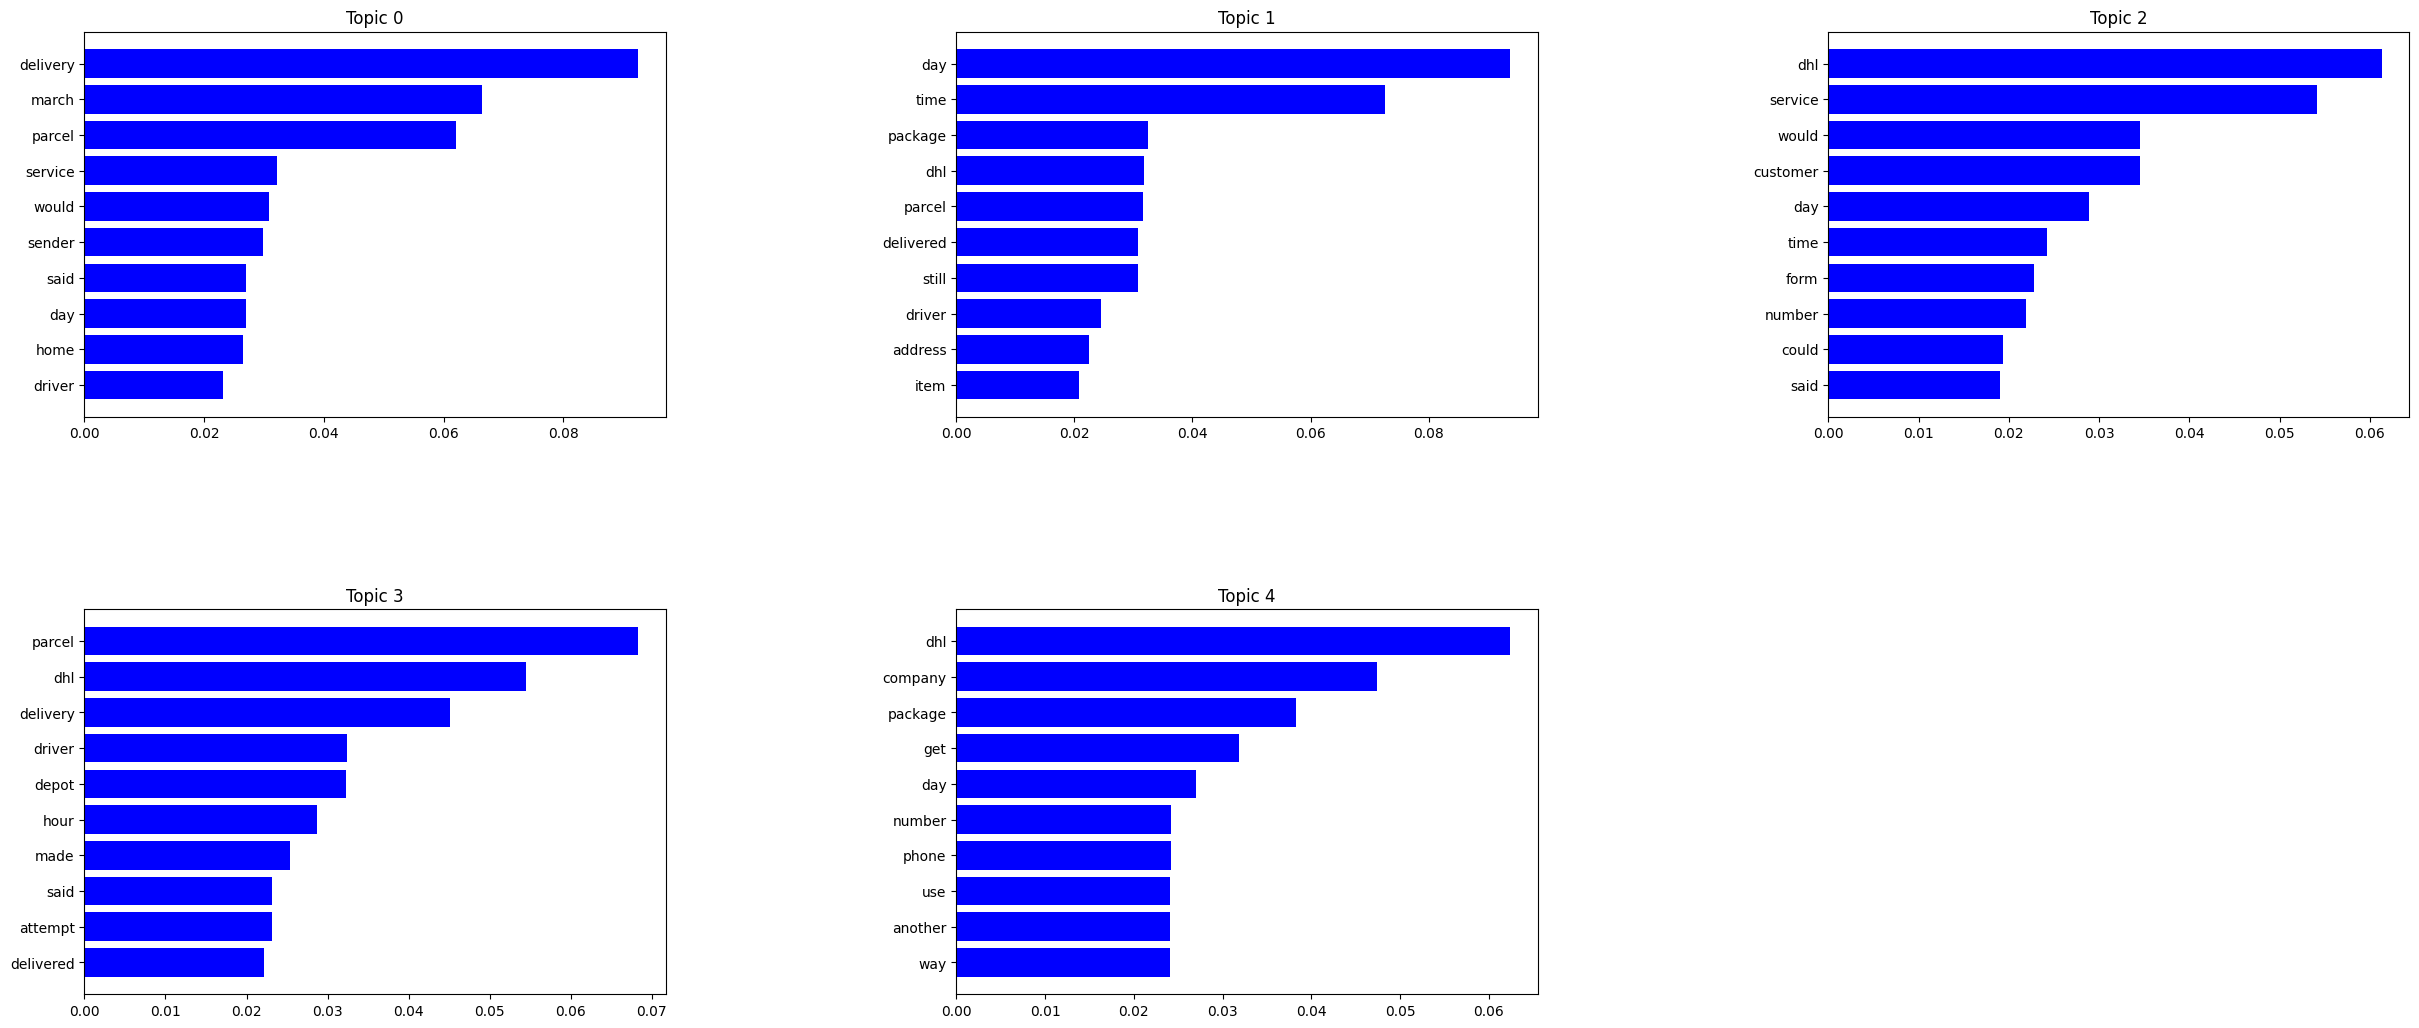

In [148]:
import math # Importing the math module
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # Importing the gridspec module

def plot_top_words(lda=tweets_lda, nb_topics=k, nb_words=10):
    top_words = [[word for word,_ in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]
    top_betas = [[beta for _,beta in lda.show_topic(topic_id, topn=50)] for topic_id in range(lda.num_topics)]

    gs  = gridspec.GridSpec(round(math.sqrt(k))+1,round(math.sqrt(k))+1)
    gs.update(wspace=.5, hspace=.5)
    plt.figure(figsize=(30,20))
    for i in range(nb_topics):
        ax = plt.subplot(gs[i])
        plt.barh(range(nb_words), top_betas[i][:nb_words], align='center',color='blue', ecolor='black')
        ax.invert_yaxis()
        ax.set_yticks(range(nb_words))
        ax.set_yticklabels(top_words[i][:nb_words])
        plt.title("Topic "+str(i))

plot_top_words()

In [149]:
!pip install pyLDAvis

In [150]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.082752  0.050532       1        1  28.767637
3     -0.077617 -0.069894       2        1  24.050009
0     -0.140375  0.015062       3        1  23.610273
4      0.107493 -0.095448       4        1  13.147752
1      0.027747  0.099749       5        1  10.424330, topic_info=         Term       Freq      Total Category  logprob  loglift
68       time  36.000000  36.000000  Default  30.0000  30.0000
3         day  56.000000  56.000000  Default  29.0000  29.0000
95      march  38.000000  38.000000  Default  28.0000  28.0000
33     parcel  64.000000  64.000000  Default  27.0000  27.0000
4    delivery  66.000000  66.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
4    delivery   2.035864  66.222326   Topic5  -4.5034  -1.2211
76       even   2.010145  15.951787   Topic5  -4.5161   0.1897
113      late   2.009472  14.116967   Topic5  -4.5164   0.3115
29       hour   2.009288  23.735480   Topic5  -4.5165  -0.2082
55   business   2.007726  17.952041   Topic5  -4.5173   0.0703

[243 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
88        2  0.306508     able
88        3  0.306508     able
88        5  0.306508     able
20        2  0.128208  address
20        3  0.256417  address
...     ...       ...      ...
40        3  0.338694    would
40        4  0.052107    would
40        5  0.052107    would
110       2  0.473995     year
110       5  0.473995     year

[362 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])

In [151]:
df_dominant_topic.head(20)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.9687,"dhl, company, package, get, day, number, phone...","[dhl, biggest, lying, package, delivery, compa..."
1,1,4,0.9736,"dhl, company, package, get, day, number, phone...","[parcel, norway, delivered, uk, address, u, ev..."
2,2,0,0.9313,"delivery, march, parcel, service, would, sende...","[shittiest, delivery, service, ever, got, 500,..."
3,3,0,0.4968,"delivery, march, parcel, service, would, sende...","[driver, refused, deliver, house, despite, giv..."
4,4,2,0.9827,"dhl, service, would, customer, day, time, form...","[entire, dhl, experience, nightmare, exception..."
5,5,2,0.9378,"dhl, service, would, customer, day, time, form...","[received, telephone, call, email, saying, ema..."
6,6,0,0.9689,"delivery, march, parcel, service, would, sende...","[home, tried, deliver, spoke, ring, doorbell, ..."
7,7,1,0.5948,"day, time, package, dhl, parcel, delivered, st...","[worst, experience, rude, cooperating]"
8,8,3,0.9419,"parcel, dhl, delivery, driver, depot, hour, ma...","[booked, courier, collection, monday, show, ca..."
9,9,0,0.9907,"delivery, march, parcel, service, would, sende...","[hey, completely, disappointed, delivery, orde..."


In [155]:
from gensim.models.ldamodel import LdaModel # Importing the LdaModel class

k = 4
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

In [156]:
tweets_lda.show_topics()

[(0,
  '0.087*"delivery" + 0.065*"march" + 0.061*"parcel" + 0.031*"said" + 0.030*"sender" + 0.028*"would" + 0.027*"driver" + 0.027*"service" + 0.026*"day" + 0.026*"depot"'),
 (1,
  '0.069*"day" + 0.044*"dhl" + 0.042*"parcel" + 0.034*"delivered" + 0.030*"address" + 0.029*"time" + 0.029*"item" + 0.023*"phone" + 0.023*"still" + 0.023*"another"'),
 (2,
  '0.058*"dhl" + 0.048*"service" + 0.034*"day" + 0.029*"would" + 0.028*"customer" + 0.028*"time" + 0.024*"company" + 0.021*"package" + 0.018*"number" + 0.017*"could"'),
 (3,
  '0.070*"parcel" + 0.053*"dhl" + 0.049*"delivery" + 0.031*"hour" + 0.030*"driver" + 0.030*"depot" + 0.028*"made" + 0.025*"attempt" + 0.024*"march" + 0.023*"time"')]

In [157]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.102663 -0.070905       1        1  39.826655
0     -0.098655 -0.067725       2        1  23.565840
3     -0.085338  0.064060       3        1  22.965659
1      0.081329  0.074570       4        1  13.641846, topic_info=        Term       Freq      Total Category  logprob  loglift
33    parcel  64.000000  64.000000  Default  30.0000  30.0000
95     march  37.000000  37.000000  Default  29.0000  29.0000
4   delivery  65.000000  65.000000  Default  28.0000  28.0000
3        day  56.000000  56.000000  Default  27.0000  27.0000
97    sender  15.000000  15.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
48    driver   5.451898  38.241303   Topic4  -3.7873   0.0441
31    number   3.705415  21.765912   Topic4  -4.1735   0.2215
64      said   3.727306  34.373790   Topic4  -4.1676  -0.2296
29      hour   2.323792  24.036873   Topic4  -4.6401  -0.3444
40     would   2.174528  38.335754   Topic4  -4.7065  -0.8775

[200 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
88        2  0.311236     able
88        3  0.311236     able
88        4  0.311236     able
20        1  0.130237  address
20        2  0.260473  address
...     ...       ...      ...
40        2  0.313024    would
40        3  0.104341    would
40        4  0.052171    would
110       3  0.479110     year
110       4  0.479110     year

[292 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

Topic 0: Parcel delivery and logistics issues
Key Words: delivery, march, parcel, said, sender, driver, service, depot

Description: This topic revolves around parcel delivery issues, including delays, communication (e.g., "said"), and concerns regarding drivers and depots. It also references a specific time frame ("March"), indicating potential delivery issues around that time.

Topic 1: Delivery tracking and delays
Key Words: day, dhl, parcel, delivered, address, time, item, phone, still, another

Description: This topic highlights concerns with the delivery process, focusing on delays, incorrect addresses, and issues with parcel tracking. Words like "still" and "delivered" suggest customers are frustrated with delivery status updates.

Topic 2: DHL service quality
Key Words: dhl, service, day, customer, time, company, package, number, could

Description: This topic concerns the general quality of service provided by DHL. Customers may be expressing dissatisfaction with service timing, customer support, or package handling. The word "could" suggests that there may be suggestions for improvement.

Topic 3: Delivery attempts and logistics
Key Words: parcel, dhl, delivery, hour, driver, depot, attempt, march, time

Description: This topic focuses on delivery attempts and issues related to timing (e.g., delivery attempts made within certain hours) and locations (e.g., depots). "Attempt" suggests that some parcels may not have been delivered successfully, resulting in frustration.

In [158]:
from gensim.models.ldamodel import LdaModel # Importing the LdaModel class

k = 3
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

In [159]:
tweets_lda.show_topics()

[(0,
  '0.076*"parcel" + 0.071*"delivery" + 0.053*"march" + 0.034*"dhl" + 0.032*"depot" + 0.029*"driver" + 0.029*"said" + 0.023*"day" + 0.019*"home" + 0.018*"hour"'),
 (1,
  '0.060*"day" + 0.046*"dhl" + 0.034*"parcel" + 0.027*"phone" + 0.027*"delivered" + 0.027*"address" + 0.026*"item" + 0.021*"time" + 0.021*"still" + 0.020*"another"'),
 (2,
  '0.053*"dhl" + 0.049*"service" + 0.030*"day" + 0.030*"would" + 0.029*"customer" + 0.027*"time" + 0.024*"package" + 0.022*"company" + 0.017*"bad" + 0.017*"number"')]

Topic 0: Delivery and parcel handling issues
Key Words: parcel, delivery, march, dhl, depot, driver, said, home, hour, day

Description: This topic primarily focuses on delivery issues, with mentions of "parcel," "delivery," and "depot" indicating logistical problems. Words like "march" and "driver" suggest there might have been specific delivery delays or difficulties related to scheduling or location. The inclusion of terms like "said" and "home" indicates some communication or delivery attempt at the customer’s home.

Topic 1: Delivery tracking, address issues, and delivery status
Key Words: day, dhl, parcel, phone, delivered, address, item, time, still, another

Description: This topic reflects customer frustration with delivery status and address accuracy. Keywords like "still" and "delivered" highlight ongoing delays or confusion about the delivery's status. The presence of terms like "phone" and "address" suggests that there might be issues with updating or confirming delivery details, including potential mistakes or miscommunication about delivery addresses.

Topic 2: Service quality concerns
Key Words: dhl, service, day, would, customer, time, package, company, bad, number

Description: This topic centers around customer service and service quality. The use of words like "bad," "service," and "company" suggests that some customers are dissatisfied with the overall service experience. There are also mentions of "time" and "package," pointing to delays or issues related to delivery timeframes or package handling.



In [160]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = pyLDAvis.gensim.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.077973  0.072618       1        1  43.778038
0     -0.124878  0.013133       2        1  40.664700
1      0.046905 -0.085751       3        1  15.557263, topic_info=        Term       Freq      Total Category  logprob  loglift
33    parcel  64.000000  64.000000  Default  30.0000  30.0000
95     march  38.000000  38.000000  Default  29.0000  29.0000
3        day  56.000000  56.000000  Default  28.0000  28.0000
4   delivery  66.000000  66.000000  Default  27.0000  27.0000
20   address  15.000000  15.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
31    number   3.853817  21.501580   Topic3  -4.2656   0.1416
1    company   3.824014  23.410425   Topic3  -4.2734   0.0488
64      said   3.911132  34.673206   Topic3  -4.2509  -0.3215
40     would   3.872558  38.520158   Topic3  -4.2608  -0.4366
4   delivery   3.864420  66.735566   Topic3  -4.2629  -0.9883

[166 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
88        2  0.618821     able
88        3  0.309411     able
20        1  0.128640  address
20        2  0.385921  address
20        3  0.450241  address
...     ...       ...      ...
40        1  0.597090    would
40        2  0.311525    would
40        3  0.103842    would
110       2  0.485890     year
110       3  0.485890     year

[230 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

Number of Topics: 3, Coherence Score: 0.27203406569232896
Number of Topics: 4, Coherence Score: 0.29895830877095797
Number of Topics: 5, Coherence Score: 0.2901286321614946
Number of Topics: 6, Coherence Score: 0.2743817372556514
Number of Topics: 7, Coherence Score: 0.30243671409732376


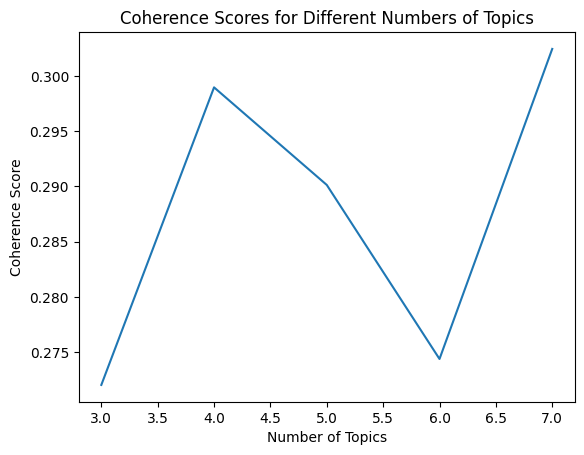

In [164]:
import gensim
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt

# Assuming you have a preprocessed corpus and dictionary
# Example:

# Get the necessary data from the previously created DataFrame (df_dominant_topic)
# This will be used as the corpus for coherence calculation
sent_topics_data = df_dominant_topic[['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']].values.tolist()

# Assign the dictionary
dictionary = text_dict  # Make sure 'text_dict' is the dictionary created earlier

# Assign the text data
texts = df['reviews']  # Make sure 'df' and 'reviews' are the DataFrame and column containing the preprocessed texts

# Range of topics to test (e.g., 3 to 7 topics)
topic_range = range(3, 8)
coherence_scores = []

for num_topics in topic_range:
    # Create and train the LDA model for the current number of topics
    lda_model = LdaModel(corpus=tweets_bow, num_topics=num_topics, id2word=dictionary, passes=15)  # Use tweets_bow as corpus

    # Compute coherence score for the model
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model_lda.get_coherence()

    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score}")

# Plot the coherence scores for different number of topics
plt.plot(topic_range, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.show()


7 Topics has the highest coherence score of 0.302, meaning it produces the most coherent and meaningful topics according to the metric.

4 Topics and 5 Topics also show relatively high coherence, but 7 Topics outperforms them.

6 Topics and 3 Topics have lower coherence scores, which suggests that these models may not be as effective in capturing the structure of the data.